## Demo for the submission
Unlocking the Black Box: Concept-Based Modeling for Interpretable Affective Computing Applications

### Requirements
- Anaconda-based Python 3.8
- `cd` to the location of this demo
- `pip install -r requirements.txt`
- All test is under a Linux-based CUDA environment. For easier use, only CPU is used in this demo.

### Usage
- Open demo.ipynb in Jupyter Notebook.
- Run the first cell for prerequisites.
- Run cells below for testing.

In [12]:
import os
import torch
from PIL import Image
from IPython.display import display

from utils import CONCEPT_MAP, LABEL_MAP, img_pre_processing
from utils import CONFIG as config

# print("current working directory:", os.getcwd())

model_saved_path = os.path.join(os.getcwd(), "model", "eph40.pt")
device = torch.device("cpu")

from utils import construct_model

model = construct_model(
    18,
    8,
    config,
    imbalance=config.get('imbalance', None),
    task_class_weights=config.get('task_class_weights', None),
)
model.load_state_dict(torch.load(model_saved_path))
model.freeze()
model.to(device)

def do_a_test(img_path='', show_proc=False, safety=False):
    img = Image.open(img_path).convert('RGB')
    display(img)
    img = img_pre_processing(img)

    input_batch = torch.unsqueeze(img, 0)
    input_batch = input_batch.repeat(64, 1, 1, 1)
    with torch.no_grad():
        c_sem, c_pred, y_pred = model(input_batch)

    y_pred = torch.argmax(y_pred, dim=1)

    topk_values, topk_indices = torch.topk(c_sem[0], k=5)
    if safety:
        safety_index = []
        for i in range(len(topk_values)):
            if topk_values[i] >= 0.5:
                safety_index += [topk_indices[i]]
        topk_indices = safety_index
    elements = [CONCEPT_MAP[index] for index in topk_indices]
    print("Predicted concept:", elements)
    for value, index in zip(topk_values, topk_indices):
        print(f"{CONCEPT_MAP[index]}={value}")
    print("Predicted class:", LABEL_MAP[y_pred[0].item()])

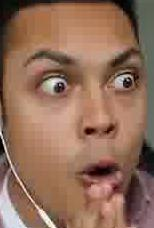

Predicted concept: ['Upper:FAU5', 'Upper:FAU2', 'Lower:FAU26', 'Lower:FAU28', 'Upper:FAU1']
Upper:FAU5=0.994078516960144
Upper:FAU2=0.9549710750579834
Lower:FAU26=0.9333935976028442
Lower:FAU28=0.8764532208442688
Upper:FAU1=0.6355692744255066
Predicted class: Surprise
Ground truth: Surprise - FAU1, FAU2, FAU5, FAU26, FAU28


In [13]:
img_path = os.path.join(os.getcwd(), "imgs", "01.jpg")
do_a_test(img_path)
print("Ground truth: Surprise - FAU1, FAU2, FAU5, FAU26, FAU28")

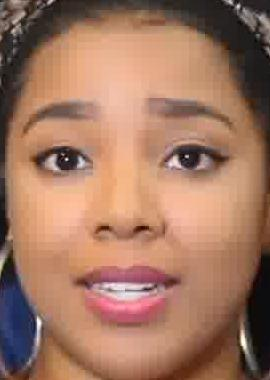

Predicted concept: ['Lower:FAU25', 'Upper:FAU2', 'Upper:FAU1', 'Lower:FAU26', 'Upper:FAU6']
Lower:FAU25=0.9970933198928833
Upper:FAU2=0.9913806319236755
Upper:FAU1=0.990058958530426
Lower:FAU26=0.9866943359375
Upper:FAU6=0.6804831027984619
Predicted class: Surprise
Ground truth: Surprise - FAU1, FAU2, FAU5, FAU25, FAU26


In [14]:
img_path = os.path.join(os.getcwd(), "imgs", "02.jpg")
do_a_test(img_path)
print("Ground truth: Surprise - FAU1, FAU2, FAU5, FAU25, FAU26")

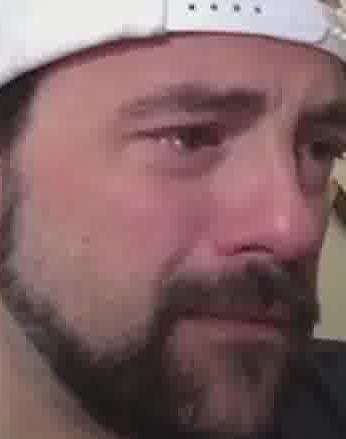

Predicted concept: ['Upper:FAU4', 'Upper:FAU1', 'Lower:FAU28']
Upper:FAU4=0.9454436898231506
Upper:FAU1=0.9276314973831177
Lower:FAU28=0.7853191494941711
Predicted class: Sadness
Ground truth: Sadness - FAU1, FAU4, FAU15, FAU26, FAU28


In [15]:
img_path = os.path.join(os.getcwd(), "imgs", "03.jpg")
do_a_test(img_path, safety=True)
print("Ground truth: Sadness - FAU1, FAU4, FAU15, FAU26, FAU28")

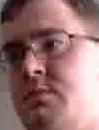

Predicted concept: ['Upper:FAU5', 'Upper:FAU2', 'Lower:FAU28', 'Lower:FAU15', 'Lower:FAU17']
Upper:FAU5=0.9223790764808655
Upper:FAU2=0.8411960601806641
Lower:FAU28=0.7951546311378479
Lower:FAU15=0.710485577583313
Lower:FAU17=0.5244100093841553
Predicted class: Neutral
Ground truth: Neutral - FAU2, FAU5, FAU15, FAU17, FAU23, FAU28


In [16]:
img_path = os.path.join(os.getcwd(), "imgs", "04.jpg")
do_a_test(img_path, safety=True)
print("Ground truth: Neutral - FAU2, FAU5, FAU15, FAU17, FAU23, FAU28")

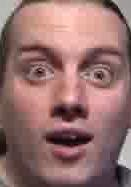

Predicted concept: ['Lower:FAU26', 'Upper:FAU5', 'Upper:FAU2', 'Upper:FAU1', 'Lower:FAU25']
Lower:FAU26=0.973590075969696
Upper:FAU5=0.9335896968841553
Upper:FAU2=0.8978234529495239
Upper:FAU1=0.8115087151527405
Lower:FAU25=0.803443193435669
Predicted class: Surprise
Ground truth: Surprise - FAU1, FAU2, FAU5, FAU25, FAU26


In [17]:
img_path = os.path.join(os.getcwd(), "imgs", "05.jpg")
do_a_test(img_path, safety=True)
print("Ground truth: Surprise - FAU1, FAU2, FAU5, FAU25, FAU26")

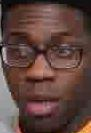

Predicted concept: ['Upper:FAU2', 'Upper:FAU1', 'Lower:FAU26', 'Lower:FAU23', 'Lower:FAU15']
Upper:FAU2=0.9884186387062073
Upper:FAU1=0.833706259727478
Lower:FAU26=0.828804612159729
Lower:FAU23=0.7559168934822083
Lower:FAU15=0.745945155620575
Predicted class: Surprise
Ground truth: Surprise - FAU1, FAU2, FAU5, FAU15, FAU23, FAU25, FAU26


In [18]:
img_path = os.path.join(os.getcwd(), "imgs", "06.jpg")
do_a_test(img_path, safety=True)
print("Ground truth: Surprise - FAU1, FAU2, FAU5, FAU15, FAU23, FAU25, FAU26")

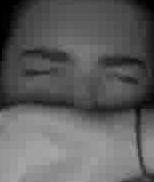

Predicted concept: ['Upper:FAU6', 'Upper:FAU2', 'Upper:FAU45', 'Upper:FAU7', 'Lower:FAU15']
Upper:FAU6=0.8222857117652893
Upper:FAU2=0.7622964978218079
Upper:FAU45=0.7595767378807068
Upper:FAU7=0.7190079689025879
Lower:FAU15=0.6646233201026917
Predicted class: Sadness
Ground truth: Sadness - FAU2, FAU6, FAU7, FAU45


In [19]:
img_path = os.path.join(os.getcwd(), "imgs", "07.jpg")
do_a_test(img_path, safety=True)
print("Ground truth: Sadness - FAU2, FAU6, FAU7, FAU45")

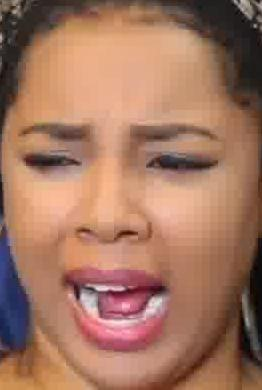

Predicted concept: ['Lower:FAU25', 'Lower:FAU26', 'Upper:FAU6', 'Lower:FAU10', 'Upper:FAU7']
Lower:FAU25=0.9978594183921814
Lower:FAU26=0.9923678040504456
Upper:FAU6=0.9511598944664001
Lower:FAU10=0.9510233402252197
Upper:FAU7=0.9403824210166931
Predicted class: Disgust
Ground truth: Disgust - FA4, FAU6, FAU7, FAU10, FAU25, FAU26


In [20]:
img_path = os.path.join(os.getcwd(), "imgs", "08.jpg")
do_a_test(img_path)
print("Ground truth: Disgust - FA4, FAU6, FAU7, FAU10, FAU25, FAU26")

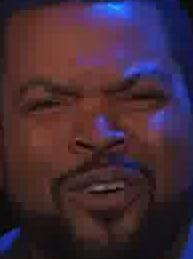

Predicted concept: ['Lower:FAU9', 'Upper:FAU6', 'Lower:FAU25', 'Lower:FAU23', 'Lower:FAU15']
Lower:FAU9=0.9657450318336487
Upper:FAU6=0.964364767074585
Lower:FAU25=0.9288211464881897
Lower:FAU23=0.9023292660713196
Lower:FAU15=0.799201488494873
Predicted class: Anger
Ground truth: Anger - FAU6, FAU7, FAU9, FAU15, FAU23, FAU25, FAU26


In [21]:
img_path = os.path.join(os.getcwd(), "imgs", "09.jpg")
do_a_test(img_path) 
print("Ground truth: Anger - FAU6, FAU7, FAU9, FAU15, FAU23, FAU25, FAU26")

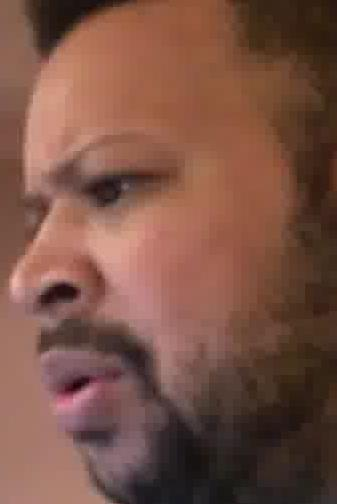

Predicted concept: ['Upper:FAU4', 'Lower:FAU15', 'Lower:FAU26', 'Lower:FAU25', 'Upper:FAU45']
Upper:FAU4=0.984704852104187
Lower:FAU15=0.8730092644691467
Lower:FAU26=0.7682885527610779
Lower:FAU25=0.6071650385856628
Upper:FAU45=0.5214729309082031
Predicted class: Anger
Ground truth: Anger - FAU4, FAU7, FAU9, FAU15, FAU25, FAU26


In [22]:
img_path = os.path.join(os.getcwd(), "imgs", "10.jpg")
do_a_test(img_path) 
print("Ground truth: Anger - FAU4, FAU7, FAU9, FAU15, FAU25, FAU26")